In [10]:
import pandas as pd 
import numpy as np
from scipy.signal import butter, filtfilt, iirnotch
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
eeg = pd.read_csv('../data/MI/train/S1/1/EEGdata.csv')

In [12]:
columns = ['FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8']

In [17]:
eeg.columns

Index(['Time', 'FZ', 'C3', 'CZ', 'C4', 'PZ', 'PO7', 'OZ', 'PO8', 'AccX',
       'AccY', 'AccZ', 'Gyro1', 'Gyro2', 'Gyro3', 'Battery', 'Counter',
       'Validation'],
      dtype='object')

In [24]:
eeg = eeg[columns]
c = eeg['FZ']

In [ ]:


# b. Power Line Interference Removal (50 Hz notch filter)
notch_freq = 50  # or 60 depending on your country
quality_factor = 30
b_notch, a_notch = iirnotch(notch_freq, quality_factor, fs)
powerline_removed = filtfilt(b_notch, a_notch, c)

# c. High-frequency Noise Reduction (low-pass filter <40 Hz)
cutoff = 40  # Hz
b_lp, a_lp = butter(4, cutoff / (0.5 * fs), btype='low')
smoothed_signal = filtfilt(b_lp, a_lp, powerline_removed)

In [38]:
time = range(len(eeg))

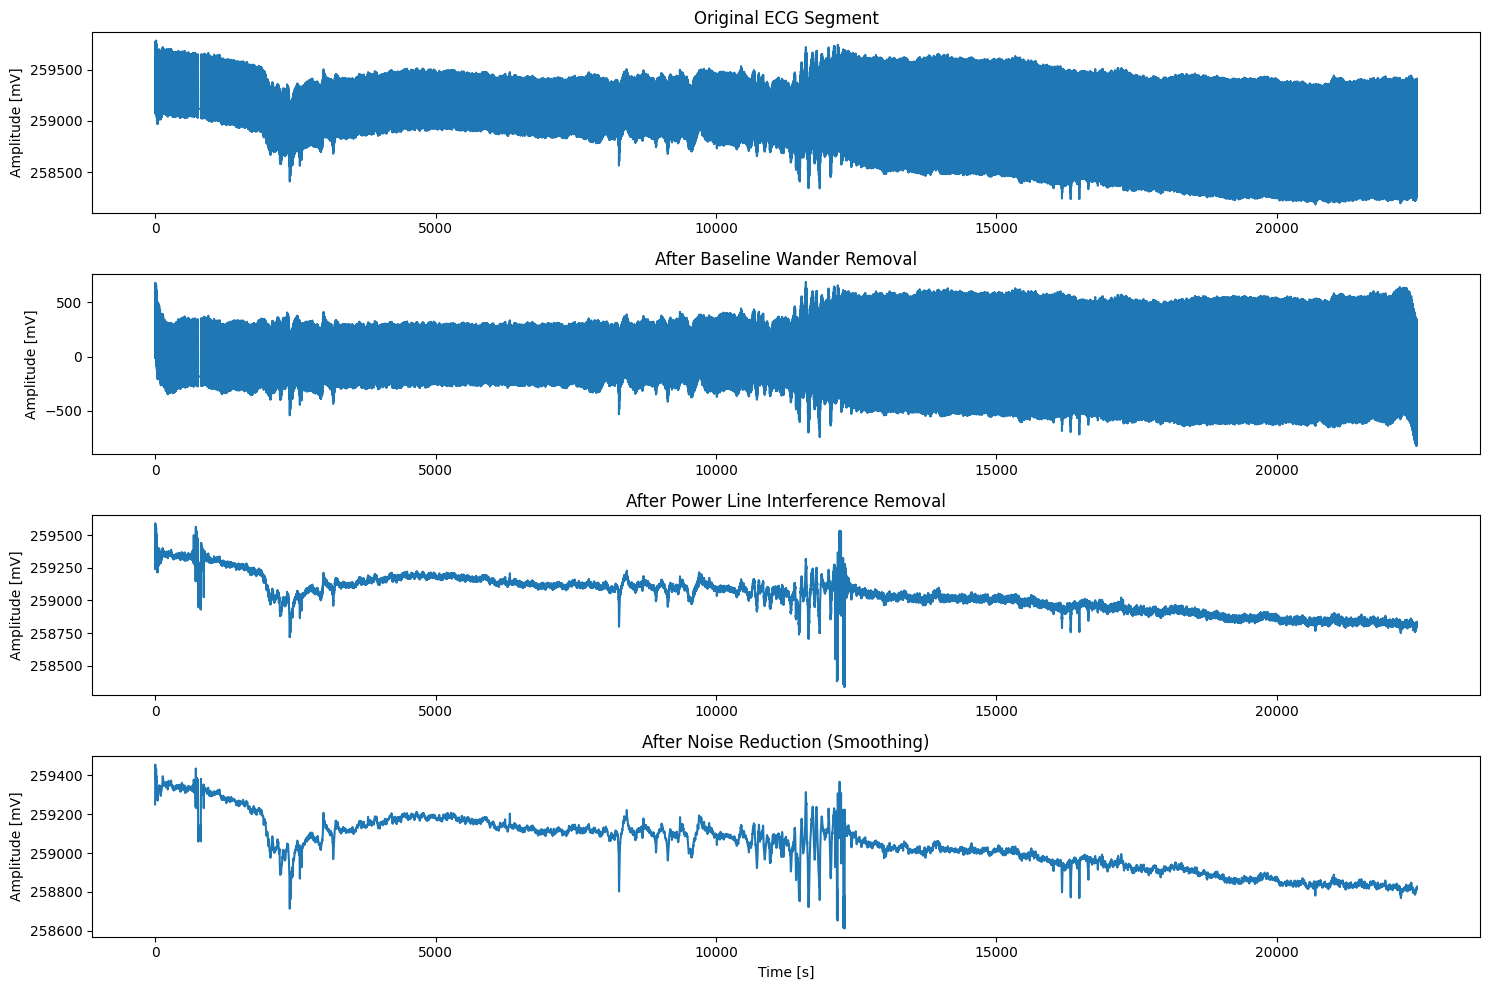

In [39]:
# Plot comparisons
plt.figure(figsize=(15, 10))

plt.subplot(4, 1, 1)
plt.plot(time, eeg['FZ'])
plt.title('Original ECG Segment')
plt.ylabel('Amplitude [mV]')

plt.subplot(4, 1, 2)
plt.plot(time, baseline_removed)
plt.title('After Baseline Wander Removal')
plt.ylabel('Amplitude [mV]')

plt.subplot(4, 1, 3)
plt.plot(time, powerline_removed)
plt.title('After Power Line Interference Removal')
plt.ylabel('Amplitude [mV]')

plt.subplot(4, 1, 4)
plt.plot(time, smoothed_signal)
plt.title('After Noise Reduction (Smoothing)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [mV]')

plt.tight_layout()
plt.show()


In [3]:
mi = pd.read_csv('submission_MI.csv')
ssvep = pd.read_csv('submission_SSVEP.csv')

In [7]:
final = pd.concat([mi,ssvep])

In [9]:
final[['id','label']].to_csv('final.csv',index=False)